# K-Nearest Neighbors

#### Problem Statement
The problem that we are going to solve here is that given a set of features that describe a tumour whether it is Malignant or Benign, our machine learning model must predict whether the tumour is Malignant or Benign. To train our machine learning model with tumour data, we will be using Small Cell Lung Cancer dataset 

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read the data
data = pd.read_csv("https://raw.githubusercontent.com/Mounika-Kajjam/Datasets/master/wbcd.csv")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [3]:
data.shape

(569, 32)

In [4]:
# Check for frequency of B and M
data.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [5]:
data.isnull().sum()

id                   0
diagnosis            0
radius_mean          0
texture_mean         0
perimeter_mean       0
area_mean            0
smoothness_mean      0
compactness_mean     0
concavity_mean       0
points_mean          0
symmetry_mean        0
dimension_mean       0
radius_se            0
texture_se           0
perimeter_se         0
area_se              0
smoothness_se        0
compactness_se       0
concavity_se         0
points_se            0
symmetry_se          0
dimension_se         0
radius_worst         0
texture_worst        0
perimeter_worst      0
area_worst           0
smoothness_worst     0
compactness_worst    0
concavity_worst      0
points_worst         0
symmetry_worst       0
dimension_worst      0
dtype: int64

In [6]:
# Split the dataset into input and output--> Train and test
# Train--> Building the model
# Test--> How well the model has learnt(Generaize on unseen data)

In [7]:
# Preparing Input and Output
# Drop the id and diagnosis columns
X = data.drop(['id', 'diagnosis'], axis=1)
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,0.1959,0.05955,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,0.1922,0.06491,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,0.1714,0.06340,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,0.1771,0.06072,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,0.1721,0.05544,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [8]:
# Accessing Output Column
y = data.diagnosis
y.head()

0    B
1    B
2    B
3    B
4    B
Name: diagnosis, dtype: object

In [9]:
# Preparing Training and Testing Data
# Storing 70% of the data(569 rows) into training and remaining 30% of the data into testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, 
                                                    random_state=10)

In [10]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
X_train

(398, 30)
(171, 30)
(398,)
(171,)


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
431,18.310,20.58,120.80,1052.0,0.10680,0.12480,0.15690,0.09451,0.1860,0.05941,...,21.860,26.20,142.20,1493.0,0.1492,0.2536,0.3759,0.15100,0.3074,0.07863
389,16.300,15.70,104.70,819.8,0.09427,0.06712,0.05526,0.04563,0.1711,0.05657,...,17.320,17.76,109.80,928.2,0.1354,0.1361,0.1947,0.13570,0.2300,0.07230
309,13.560,13.90,88.59,561.3,0.10510,0.11920,0.07860,0.04451,0.1962,0.06303,...,14.980,17.13,101.10,686.6,0.1376,0.2698,0.2577,0.09090,0.3065,0.08177
111,8.219,20.70,53.27,203.9,0.09405,0.13050,0.13210,0.02168,0.2222,0.08261,...,9.092,29.72,58.08,249.8,0.1630,0.4310,0.5381,0.07879,0.3322,0.14860
35,13.660,15.15,88.27,580.6,0.08268,0.07548,0.04249,0.02471,0.1792,0.05897,...,14.540,19.64,97.96,657.0,0.1275,0.3104,0.2569,0.10540,0.3387,0.09638
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,19.450,19.33,126.50,1169.0,0.10350,0.11880,0.13790,0.08591,0.1776,0.05647,...,25.700,24.57,163.10,1972.0,0.1497,0.3161,0.4317,0.19990,0.3379,0.08950
320,12.450,16.41,82.85,476.7,0.09514,0.15110,0.15440,0.04846,0.2082,0.07325,...,13.780,21.03,97.82,580.6,0.1175,0.4061,0.4896,0.13420,0.3231,0.10340
527,17.950,20.01,114.20,982.0,0.08402,0.06722,0.07293,0.05596,0.2129,0.05025,...,20.580,27.83,129.20,1261.0,0.1072,0.1202,0.2249,0.11850,0.4882,0.06111
125,11.460,18.16,73.59,403.1,0.08853,0.07694,0.03344,0.01502,0.1411,0.06243,...,12.680,21.61,82.69,489.8,0.1144,0.1789,0.1226,0.05509,0.2208,0.07638


In [11]:
#Before Splitting if you apply standardization--> you are considering whole
# you are including test data also into training data

In [12]:
# Scaling Data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Scaling for training data
scaled_X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
scaled_X_train

#Scaling for test data
#Testing the data based on training data
scaled_X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
scaled_X_test

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,-0.077524,0.385200,-0.028576,-0.181721,1.617086,1.210962,0.105416,0.353917,1.441699,1.621128,...,0.217083,0.452310,0.154687,0.075338,1.470507,0.755583,0.005892,0.674696,0.532371,1.661987
1,-0.644210,-0.376307,-0.630196,-0.629478,0.808428,-0.078482,-0.406623,-0.055776,-0.746101,0.554649,...,-0.541540,0.425511,-0.526524,-0.549443,0.146485,-0.400616,-0.607829,-0.159783,-0.649397,-0.331922
2,-0.392671,-0.471786,-0.431337,-0.427265,-0.688285,-0.898236,-0.696996,-0.630673,-0.010737,-0.617927,...,-0.362539,-0.550999,-0.430883,-0.402265,-0.391807,-0.613767,-0.364118,-0.197839,0.654169,-0.558780
3,-0.415801,-0.665074,-0.404851,-0.475219,1.400979,0.139137,-0.325629,-0.363643,0.516091,0.465086,...,-0.526623,-0.676622,-0.583600,-0.549987,1.149269,-0.465763,-0.363183,-0.417921,0.464889,-0.448273
4,-0.629754,-0.604526,-0.499866,-0.603191,0.933909,1.316231,1.011138,0.733116,3.205109,1.510897,...,-0.490396,0.157515,-0.421319,-0.478029,0.302763,1.014906,0.860048,1.146956,4.775544,1.019133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,-0.913098,1.172324,-0.924489,-0.806559,-0.960859,-0.673919,-0.874780,-1.016766,0.636823,0.073768,...,-0.641695,1.006726,-0.669060,-0.634088,-0.482969,-0.540397,-0.957069,-1.204563,0.306881,-0.401520
167,-1.534429,-1.100553,-1.532835,-1.194808,-0.301385,-1.119109,-1.068863,-1.233148,-0.292443,0.619409,...,-1.444641,-1.406910,-1.457018,-1.080697,-0.665293,-1.126909,-1.246809,-1.703417,-0.461762,-0.283575
168,-0.112219,0.620406,-0.156383,-0.230541,-1.125379,-0.356773,-0.558329,-0.665145,-0.610735,-0.572457,...,-0.264515,0.770555,-0.244537,-0.351514,-1.346840,-0.479045,-0.567132,-0.757521,-0.702066,-0.721353
169,-0.005242,-0.495074,0.023136,-0.110946,0.968765,0.510448,0.158451,0.157954,0.388043,-0.199052,...,0.074308,-0.564399,0.077557,-0.053352,0.854077,0.489936,0.254280,0.396537,0.321694,-0.225665


In [13]:
# Model Building:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=40, metric='euclidean')

# Apply the knn object on the dataset(Training Phase)
# Syntax: objectName.fit(Input, Output)
knn.fit(scaled_X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=40, p=2,
                     weights='uniform')

In [14]:
# Predictions on the data
#predict function--> gives the predicted values
# Syntax:objectname.predict(Input)
y_train_pred = knn.predict(scaled_X_train)
y_train_pred

array(['M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'B',
       'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'M',
       'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'M', 'B',
       'B', 'M', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'M', 'B', 'M',
       'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M',
       'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B',
       'M', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'M', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B

In [15]:
# Check the accuracy, classification report
from sklearn.metrics import classification_report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           B       0.93      1.00      0.96       259
           M       1.00      0.85      0.92       139

    accuracy                           0.95       398
   macro avg       0.96      0.92      0.94       398
weighted avg       0.95      0.95      0.95       398



In [16]:
from sklearn.metrics import accuracy_score
# Checking for optimum k-value
# Build the models with multiple k values
scores=[]
for k in range(1, 20):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_X_train, y_train)
    pred_test = knn_model.predict(scaled_X_test)
    scores.append(accuracy_score(y_test, pred_test))
scores

[0.9532163742690059,
 0.9590643274853801,
 0.9649122807017544,
 0.9649122807017544,
 0.9649122807017544,
 0.9590643274853801,
 0.9707602339181286,
 0.9766081871345029,
 0.9766081871345029,
 0.9766081871345029,
 0.9766081871345029,
 0.9707602339181286,
 0.9707602339181286,
 0.9707602339181286,
 0.9707602339181286,
 0.9649122807017544,
 0.9649122807017544,
 0.9649122807017544,
 0.9649122807017544]

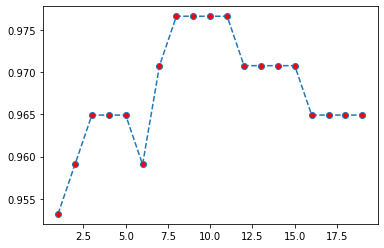

In [17]:
# Plot of K values and Scores
plt.plot(range(1,20), scores, marker='o', markerfacecolor='r', linestyle='--')

In [18]:
# Optimum k value is 7
final_model = KNeighborsClassifier(n_neighbors=7, metric='euclidean')
final_model.fit(scaled_X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [19]:
# Prediction on  training data
final_train_pred = final_model.predict(scaled_X_train)
final_train_pred

array(['M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B',
       'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'B',
       'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'M',
       'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'M', 'B',
       'B', 'M', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'M', 'B', 'M',
       'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M',
       'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B',
       'M', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B',
       'M', 'M', 'B', 'M', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'B

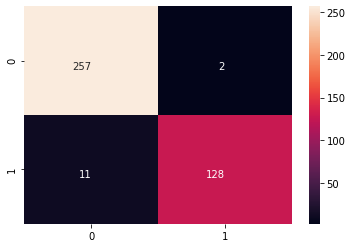

In [20]:
# Confusion Matrix of Training data
#Syntax: confusion_matrix(ActualValues, Predicted Values)
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_train, final_train_pred), annot=True, 
            fmt='d', annot_kws={'va':'top','ha':'right'}) # d--> integer formatting

In [21]:
# Classification report for training Data
# Precision--> PPV--> Out of the positive predicted values, how many truely positive
print(classification_report(y_train, final_train_pred))

              precision    recall  f1-score   support

           B       0.96      0.99      0.98       259
           M       0.98      0.92      0.95       139

    accuracy                           0.97       398
   macro avg       0.97      0.96      0.96       398
weighted avg       0.97      0.97      0.97       398



In [22]:
# Predictions on Test Data
final_test_pred = final_model.predict(scaled_X_test)  # y_test
final_test_pred

array(['M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'M',
       'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'M', 'M', 'B',
       'B', 'M', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B',
       'B', 'B', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'M',
       'B', 'M', 'B', 'B', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'M',
       'M', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'M', 'B', 'M', 'B',
       'B', 'M', 'M', 'M', 'M', 'B', 'M', 'M', 'M', 'B', 'B', 'M', 'M',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M',
       'M', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B',
       'M', 'M', 'M', 'M', 'B', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'B',
       'B', 'M'], dtype=object)

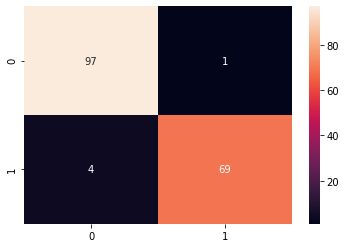

In [23]:
# Compare actual values of test data(y_test) and final_test_pred(model predicted values)
# Confusion_matrix(actualValues, predictedValues)
sns.heatmap(confusion_matrix(y_test, final_test_pred), annot=True, fmt='d')

In [24]:
# Classification Report for Test Data
print(classification_report(y_test, final_test_pred))

              precision    recall  f1-score   support

           B       0.96      0.99      0.97        98
           M       0.99      0.95      0.97        73

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



##### What is the accuracy we can get with our data random_state=2, 80%, random_state=5, 82%, random_state= 6, 76%


##### Whenever we keep changing our random state, accuracy fluctuates. In order to overcome this problem we use KFold Cross Validation


##### When we use KFold Cross Validation--> Our model will be trained on all the records considering all the splits